In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("data/New_data.csv") #our data

In [38]:
df.head(11) #showing the first 11 rows of data

,size,Area,price
0,2,1056,39.07
1,4,2600,120.00
2,3,1440,62.00
3,3,1521,95.00
4,2,1200,51.00
5,2,1170,38.00
6,4,2732,204.00
7,4,3300,600.00
8,3,1310,63.25
9,6,1020,370.00


In [39]:
df.sample(10) # display randomly a samples from the dataset


,size,Area,price
26,2,660,23.10
19,2,1100,48.00
0,2,1056,39.07
50,2,1185,75.00
58,4,5700,650.00
36,3,1724,125.00
6,4,2732,204.00
13,2,1100,40.00
51,3,1600,75.00
45,2,800,130.00


In [40]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
# Using sx and sy to scale each feature to the range between 0 and 1

scaled_X = sx.fit_transform(df.drop('price',axis='columns').values) #eliminate the vector price and scale each feature with respect to column 
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1)) #scale vector of price and eliminate the column of enumerating


scaled_X


array([[0.14285714, 0.10520231],
       [0.42857143, 0.4026975 ],
       [0.28571429, 0.17919075],
       [0.28571429, 0.19479769],
       [0.14285714, 0.13294798],
       [0.14285714, 0.12716763],
       [0.42857143, 0.42813102],
       [0.42857143, 0.53757225],
       [0.28571429, 0.15414258],
       [0.71428571, 0.0982659 ],
       [0.28571429, 0.24855491],
       [0.42857143, 0.43834297],
       [0.14285714, 0.09441233],
       [0.14285714, 0.11368015],
       [0.28571429, 0.33526012],
       [0.14285714, 0.12813102],
       [0.28571429, 0.12909441],
       [0.28571429, 0.19845857],
       [0.28571429, 0.43545279],
       [0.14285714, 0.11368015],
       [0.        , 0.01734104],
       [0.28571429, 0.23988439],
       [0.42857143, 0.44123314],
       [0.28571429, 0.24219653],
       [0.14285714, 0.        ],
       [0.28571429, 0.14258189],
       [0.14285714, 0.02890173],
       [0.28571429, 0.21194605],
       [0.14285714, 0.12350674],
       [0.28571429, 0.09922929],
       [0.

In [41]:
scaled_y

array([[0.03790551],
       [0.16535433],
       [0.07401575],
       [0.12598425],
       [0.05669291],
       [0.03622047],
       [0.2976378 ],
       [0.92125984],
       [0.07598425],
       [0.55905512],
       [0.08661417],
       [0.44094488],
       [0.03622047],
       [0.03937008],
       [0.20944882],
       [0.09212598],
       [0.0519685 ],
       [0.07086614],
       [0.43307087],
       [0.0519685 ],
       [0.        ],
       [0.16850394],
       [0.57480315],
       [0.13858268],
       [0.01614173],
       [0.06456693],
       [0.01275591],
       [0.10393701],
       [0.0531811 ],
       [0.0503937 ],
       [0.03149606],
       [0.17007874],
       [0.06675591],
       [0.17322835],
       [0.03307087],
       [0.0480315 ],
       [0.17322835],
       [0.06475591],
       [0.04724409],
       [0.10393701],
       [0.03622047],
       [0.03622047],
       [0.0519685 ],
       [0.02834646],
       [0.12570079],
       [0.18110236],
       [0.03307087],
       [0.055

In [42]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = [] # intialization of a list
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b # linear regression's model

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted)) 
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)

w, b, cost



(array([0.69180115, 0.84295234]), -0.2066141961513386, 0.025046267102882897)

In [43]:
scaled_y.reshape(66,)

array([0.03790551, 0.16535433, 0.07401575, 0.12598425, 0.05669291,
       0.03622047, 0.2976378 , 0.92125984, 0.07598425, 0.55905512,
       0.08661417, 0.44094488, 0.03622047, 0.03937008, 0.20944882,
       0.09212598, 0.0519685 , 0.07086614, 0.43307087, 0.0519685 ,
       0.        , 0.16850394, 0.57480315, 0.13858268, 0.01614173,
       0.06456693, 0.01275591, 0.10393701, 0.0531811 , 0.0503937 ,
       0.03149606, 0.17007874, 0.06675591, 0.17322835, 0.03307087,
       0.0480315 , 0.17322835, 0.06475591, 0.04724409, 0.10393701,
       0.03622047, 0.03622047, 0.0519685 , 0.02834646, 0.12570079,
       0.18110236, 0.03307087, 0.05511811, 0.13228346, 0.11968504,
       0.09448819, 0.09448819, 0.04566929, 0.26771654, 0.21259843,
       0.04724409, 0.35433071, 0.06299213, 1.        , 0.04566929,
       0.19685039, 0.07401575, 0.04409449, 0.06614173, 0.11023622,
       0.03414173])

In [44]:
def predict(bedrooms,area,w,b):
    scaled_X = sx.transform([[bedrooms, area]])[0]
    # here w1 = w[0] , w2 = w[1] and bias is b
    # equation for price is w1*bedrooms + w2*area + bias
    # scaled_X[0] is number of bedrooms (size)
    # scaled_X[1] is area
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to rescal it back to original value
    return scaled_price

predict(4,2732,w,b) #test the prediction


0.450766055394613

In [45]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500,0.01)
w, b, cost

(array([0.69180115, 0.84295234]), -0.2066141961513386, 0.025046267102882897)

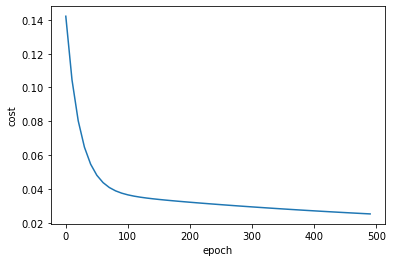

In [46]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [47]:
import random
random.randint(0,6)
    


1

In [48]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedrooms )
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.85205837, 0.90645047]), -0.24970318894257088, 0.0038518110202068285)

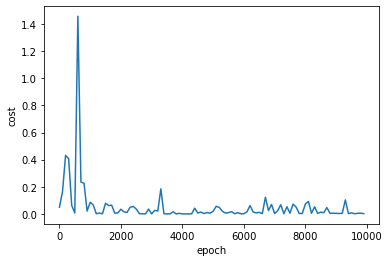

In [51]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [52]:
predict(4,2732,w_sgd, b_sgd) #test prediction

0.5035442514970534